In [2]:
#import squidpy as sq
import scanpy as sc
import scipy as scp
import numpy as np 
import pandas as pd
#import scvi
import seaborn as sns
import pyensembl as ensb
import matplotlib as plt
import mygene

In [34]:
import gseapy as gp
import scanpy as sc

In [16]:
# sclcCells = sc.read_h5ad('hlca/sclcSinglets.h5ad')
# normalCells = sc.read_h5ad('hlca/normalCells.h5ad')
# sclcCells

In [3]:
#sclcCells.var_names = [genefEnsemblID(sclcCells, id) for id in sclcCells.var_names]

NameError: name 'sclcCells' is not defined

In [12]:
#sclcCells.write_h5ad('sclcSingletwGenes.h5ad')

In [6]:
sclcCells = sc.read_h5ad('hlca\sclcSingletwGenes.h5ad')
sclcCells.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length
A1BG,False,A1BG,A1BG,NCBITaxon:9606,gene,3999
A1BG-AS1,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374
A1CF,False,A1CF,A1CF,NCBITaxon:9606,gene,9603
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318
A2M-AS1,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948
...,...,...,...,...,...,...
RAB1B,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950
STC1,False,STC1,STC1,NCBITaxon:9606,gene,4134
STXBP1,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358
TEC,False,TEC,TEC,NCBITaxon:9606,gene,4004


In [3]:
# normalCells.var['mitochondrial'] = normalCells.var.feature_name.str.startswith('MT-')
# ribosomalGeneSet = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt" # filter out ribosomal genes too
# df_ribo = pd.read_table(ribosomalGeneSet, skiprows=2, header = None)
# normalCells.var[normalCells.var.feature_name.isin(df_ribo[0].values)] # # two ribosomal genes
# normalCells.var['ribosomal'] = normalCells.var.feature_name.isin(df_ribo[0].values) # bool for ribosomal genes
# sc.pp.calculate_qc_metrics(normalCells, qc_vars=['mitochondrial', 'ribosomal'], percent_top=None, log1p=False, inplace=True)
# normalCells

In [4]:
# sc.pp.filter_genes(normalCells, min_cells=3)
# sc.pp.filter_cells(normalCells, min_genes=200)
# normalCells

In [5]:
# sc.pl.violin(sclcCells, ['n_genes_by_counts', 'total_counts', 'pct_counts_mitochondrial', 'pct_counts_ribosomal'], jitter=0.4, multi_panel=True)

In [7]:
sclcCells.var['mitochondrial'] = sclcCells.var.feature_name.str.startswith('MT-')

In [8]:
ribosomalGeneSet = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt" # filter out ribosomal genes too
df_ribo = pd.read_table(ribosomalGeneSet, skiprows=2, header = None)
sclcCells.var[sclcCells.var.feature_name.isin(df_ribo[0].values)] # # two ribosomal genes
sclcCells.var['ribosomal'] = sclcCells.var.feature_name.isin(df_ribo[0].values) # bool for ribosomal genes

In [9]:
# Calculating QC metrics
sc.pp.calculate_qc_metrics(sclcCells, qc_vars=['mitochondrial', 'ribosomal'], percent_top=None, log1p=False, inplace=True)
sclcCells

AnnData object with n_obs × n_vars = 20561 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [10]:
sclcCells.obs.n_genes_by_counts.min()

186

In [11]:
sc.pp.filter_genes(sclcCells, min_cells=3)
sc.pp.filter_cells(sclcCells, min_genes=200)
sclcCells

AnnData object with n_obs × n_vars = 20507 × 21184
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [12]:
sclcCells.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length,mitochondrial,ribosomal,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
A1BG,False,A1BG,A1BG,NCBITaxon:9606,gene,3999,False,False,3347,0.156388,83.721609,3215.494629,3347
A1BG-AS1,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374,False,False,417,0.017344,97.971889,356.607117,417
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318,False,False,2695,0.181340,86.892661,3728.530029,2695
A2M-AS1,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948,False,False,149,0.007434,99.275327,152.845627,149
A2ML1,False,A2ML1,A2ML1,NCBITaxon:9606,gene,7156,False,False,25,0.001475,99.878411,30.327440,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAB1B,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950,False,False,3156,0.134623,84.650552,2767.977051,3156
STC1,False,STC1,STC1,NCBITaxon:9606,gene,4134,False,False,129,0.007897,99.372599,162.361725,129
STXBP1,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358,False,False,376,0.013774,98.171295,283.200073,376
TEC,False,TEC,TEC,NCBITaxon:9606,gene,4004,False,False,271,0.010885,98.681971,223.807938,271


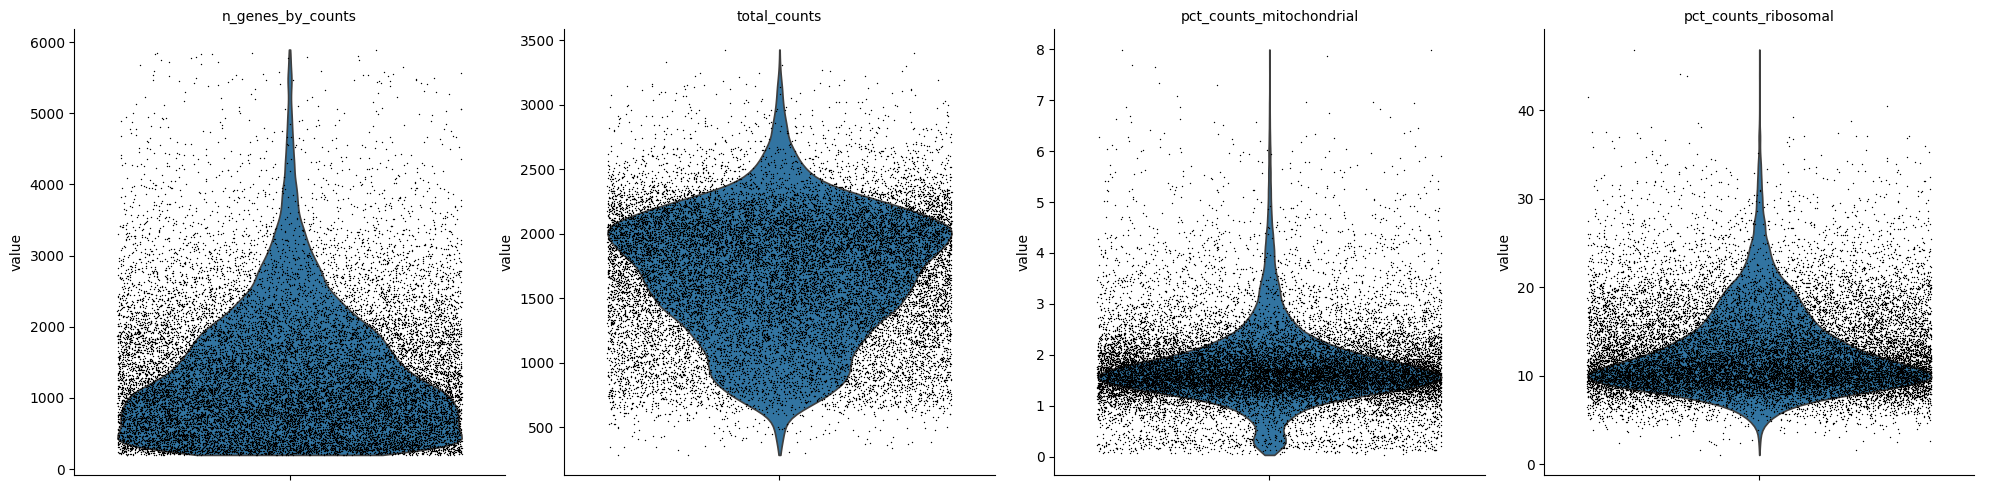

In [13]:
sc.pl.violin(sclcCells, ['n_genes_by_counts', 'total_counts', 'pct_counts_mitochondrial', 'pct_counts_ribosomal'], jitter=0.4, multi_panel=True)

In [14]:
upper_lim = np.quantile(sclcCells.obs.n_genes_by_counts.values, .98)
upper_lim
sclcCells = sclcCells[sclcCells.obs.n_genes_by_counts < upper_lim]
sclcCells = sclcCells[sclcCells.obs.pct_counts_mitochondrial < 20] # less than 20%
sclcCells = sclcCells[sclcCells.obs.pct_counts_ribosomal < 10] # less than 10%

In [15]:
sclcCells

View of AnnData object with n_obs × n_vars = 6114 × 21184
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmoniz

In [16]:
# Normalisation
sc.pp.normalize_total(sclcCells, target_sum=1e4) #normalize every cell to 10,000 UMI
sc.pp.log1p(sclcCells) #change to log counts
sclcCells.X.sum(axis = 1)
sclcCells.raw = sclcCells

C:\Users\User\miniconda3\envs\py39\lib\site-packages\scanpy\preprocessing\_normalization.py:184: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
sc.pp.highly_variable_genes(sclcCells, n_top_genes = 2000)

In [18]:
sclcCells.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length,mitochondrial,ribosomal,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
A1BG,False,A1BG,A1BG,NCBITaxon:9606,gene,3999,False,False,3347,0.156388,83.721609,3215.494629,3347,False,0.512241,1.531479,-1.233271
A1BG-AS1,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374,False,False,417,0.017344,97.971889,356.607117,417,False,0.101821,1.920774,0.221848
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318,False,False,2695,0.181340,86.892661,3728.530029,2695,True,1.128693,2.657093,2.962579
A2M-AS1,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948,False,False,149,0.007434,99.275327,152.845627,149,False,0.021716,2.341907,0.913430
A2ML1,False,A2ML1,A2ML1,NCBITaxon:9606,gene,7156,False,False,25,0.001475,99.878411,30.327440,25,True,0.009238,2.694983,1.493249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAB1B,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950,False,False,3156,0.134623,84.650552,2767.977051,3156,False,0.624000,1.594681,-0.792717
STC1,False,STC1,STC1,NCBITaxon:9606,gene,4134,False,False,129,0.007897,99.372599,162.361725,129,True,0.089473,2.869004,1.779025
STXBP1,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358,False,False,376,0.013774,98.171295,283.200073,376,False,0.090565,2.140713,0.583030
TEC,False,TEC,TEC,NCBITaxon:9606,gene,4004,False,False,271,0.010885,98.681971,223.807938,271,False,0.077112,1.619393,-0.273080


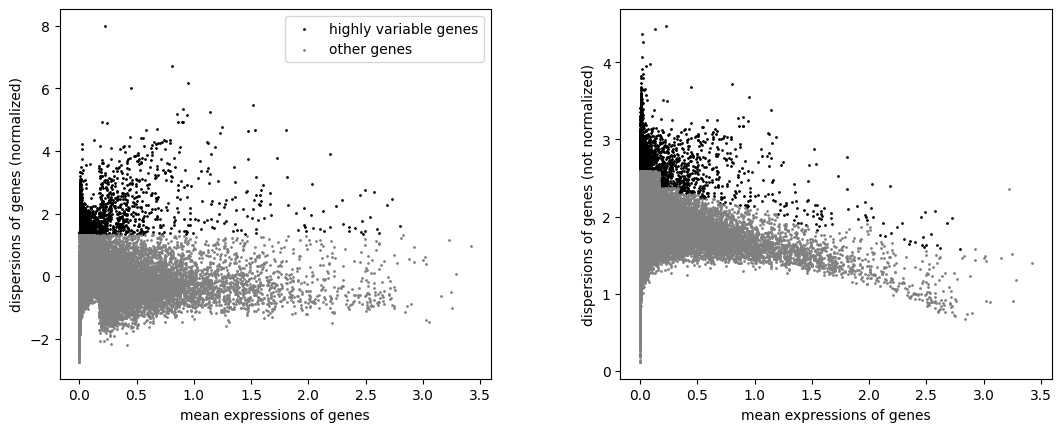

In [19]:
sc.pl.highly_variable_genes(sclcCells)

C:\Users\User\miniconda3\envs\py39\lib\site-packages\scanpy\preprocessing\_simple.py:640: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


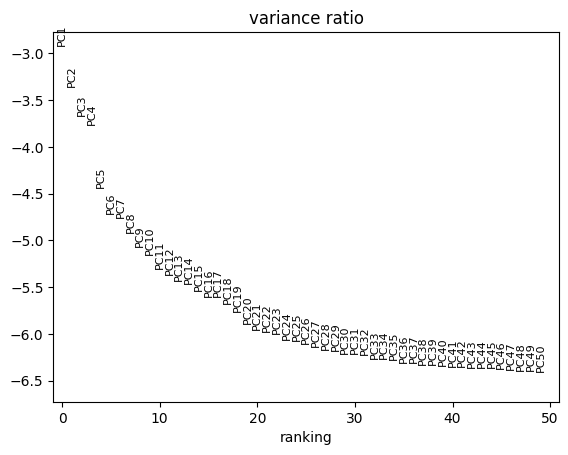

In [20]:
sclcCells = sclcCells[:, sclcCells.var.highly_variable]
sc.pp.regress_out(sclcCells, ['total_counts', 'pct_counts_mitochondrial', 'pct_counts_ribosomal'])
sc.pp.scale(sclcCells, max_value=10)
sc.tl.pca(sclcCells, svd_solver='arpack')
sc.pl.pca_variance_ratio(sclcCells, log=True, n_pcs = 50)

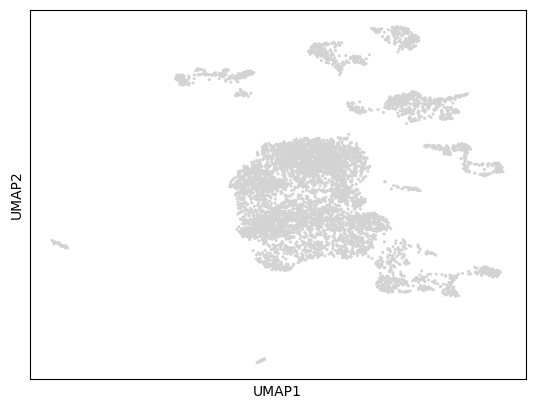

In [21]:
sc.pp.neighbors(sclcCells, n_pcs = 30)
sc.tl.umap(sclcCells)
sc.pl.umap(sclcCells)

In [22]:
sc.tl.leiden(sclcCells, resolution = 0.5)
sc.tl.paga(sclcCells, groups = 'leiden')

cluster_labels = sclcCells.obs['leiden']
cluster_labels

C:\Users\User\miniconda3\envs\py39\lib\site-packages\scanpy\tools\_leiden.py:144: FutureWarning: Use of leidenalg is discouraged and will be deprecated in the future.  Please use `flavor="igraph"` `n_iterations=2` to achieve similar results.  `directed` must also be `False` to work with `igraph`'s implementation.
  warnings.warn(msg, FutureWarning)


BT1248_GGACAGGATGACCA_lambrechts         12
scrBT1428_GGACGTCAGCTAACAA_lambrechts     4
scrBT1428_GTTCTCGCACACAGAG_lambrechts     7
BT1248_TAGCATCTGAACTC_lambrechts          5
scrBT1428_CCTCTGAAGACAAAGG_lambrechts     0
                                         ..
scrBT1428_CGATGTACACTCGACG_lambrechts    10
BT1242_GTACGTGACCATGA_lambrechts          8
scrBT1428_AGACGTTTCTATCGCC_lambrechts     0
scrBT1428_AACTCCCTCAGATAAG_lambrechts     4
BT1247_GCCTCAACAGATCC_lambrechts          4
Name: leiden, Length: 6114, dtype: category
Categories (17, object): ['0', '1', '2', '3', ..., '13', '14', '15', '16']

In [23]:
sclcCells.obs

,suspension_type,donor_id,is_primary_data,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,tissue_ontology_term_id,organism_ontology_term_id,...,development_stage,observation_joinid,doublet,n_genes_by_counts,total_counts_mitochondrial,pct_counts_mitochondrial,total_counts_ribosomal,pct_counts_ribosomal,n_genes,leiden
BT1248_GGACAGGATGACCA_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000625,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,wxUib0^bFj,False,554,20.178600,1.521514,99.066490,7.469847,554,12
scrBT1428_GGACGTCAGCTAACAA_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0002144,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,GhFu_CKEE-,False,338,20.098219,2.012080,74.763618,7.484763,338,4
scrBT1428_GTTCTCGCACACAGAG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000003,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,76<q}C0766,False,2285,34.341511,1.324262,189.404541,7.303731,2285,7
BT1248_TAGCATCTGAACTC_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000003,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,tONvO<J8zG,False,1283,20.302441,1.280168,116.973869,7.375772,1283,5
scrBT1428_CCTCTGAAGACAAAGG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000583,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,iT{#pmA`tb,False,1995,36.309513,1.716592,209.572998,9.907907,1995,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrBT1428_CGATGTACACTCGACG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000861,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,y6fy!ewJ&(,False,1266,30.179634,1.476956,202.126862,9.891851,1266,10
BT1242_GTACGTGACCATGA_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000003,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,)F?+?YKuw2,False,839,37.006516,2.203045,142.844955,8.503743,839,8
scrBT1428_AGACGTTTCTATCGCC_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000583,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,&|+z*D`I)J,False,2516,32.517727,1.432297,192.260544,8.468432,2516,0
scrBT1428_AACTCCCTCAGATAAG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0002144,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,unknown,7Bb>U?`BZg,False,313,14.471952,1.590312,74.470947,8.183555,313,4


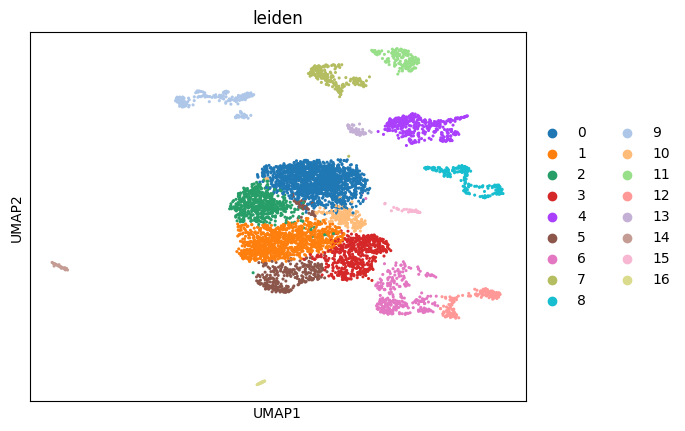

In [24]:
sc.pl.umap(sclcCells, color=['leiden'])

In [25]:
#sc.tl.leiden(sclcCells, resolution = 1)
sc.tl.rank_genes_groups(sclcCells, 'leiden')

In [26]:
markers = sc.get.rank_genes_groups_df(sclcCells, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,MCEMP1,74.954720,3.274019,0.000000,0.000000
1,0,CD52,63.619358,2.284089,0.000000,0.000000
2,0,MARCO,62.090309,2.319719,0.000000,0.000000
3,0,ALOX5AP,60.009403,2.545918,0.000000,0.000000
4,0,GCHFR,59.829151,2.410321,0.000000,0.000000
...,...,...,...,...,...,...
339161,16,DNAJB11,2.364131,1.620875,0.027288,0.049048
339162,16,IGLV1-40,2.363094,5.381992,0.027376,0.049173
339163,16,EIF1AY,2.359141,2.201022,0.027589,0.049533
339164,16,CCPG1,2.358354,1.696108,0.027629,0.049587


In [27]:
def ensemblIDfGene(adata,gene):
    '''
    ENSEMBL ID from gene
    '''
    obj = adata.var[adata.var.feature_name == gene]
    id = obj.index.tolist()[0]
    return id

def genefEnsemblID(adata,id):
    '''
    Gene from ENSEMBL ID
    '''
    obj = adata.var[adata.var.index == id]
    gene_name = obj.feature_name.tolist()[0]
    return gene_name


In [28]:
cellTypeDict = {
    '0':'alveolar macrophage',    
    '1':'lung macrophage',
    '2':'2', # native
    '3':'CD1c+ myeloid dentritic cell',
    '4':'capillary endothelial',
    '5':'T-cell', # CD4+, CD8+ T-cells
    '6':'vein endothelial cell',
    '7':'type 1 pneumocyte',
    '8':'native',
    '9':'elicited macrophage',
    '10':'fibroblast', # alveolar type 1 fibroblast, bronchous fibroblast, alveolar type 2 fibroblast
    '11':'type 2 pneumocyte',
    '12':'natural killer cell',
    '13':'NK Cells',
    '14':'14', # native
    '15':'mast cell',
    '16':'plasma cell',
}

sclcCells.obs['leiden_cell_type'] = sclcCells.obs['leiden'].map(cellTypeDict)


In [29]:
sclcCells.var_names = [genefEnsemblID(sclcCells, id) for id in sclcCells.var_names]
sclcCells.var_names

Index(['A2M', 'A2ML1', 'ABCA4', 'ABCA8', 'ABCA9', 'ABCB5', 'ABCC8', 'ABI3BP',
       'ACAP1', 'ACE',
       ...
       'ZNF80', 'ZNF83', 'ZNF831', 'ZNF843', 'ZSCAN18', 'COL4A1', 'ERG',
       'IL15RA', 'STC1', 'WFS1'],
      dtype='object', length=2000)

In [31]:
sclcCells.obs.cell_type

BT1248_GGACAGGATGACCA_lambrechts         CD8-positive, alpha-beta T cell
scrBT1428_GGACGTCAGCTAACAA_lambrechts         capillary endothelial cell
scrBT1428_GTTCTCGCACACAGAG_lambrechts                        native cell
BT1248_TAGCATCTGAACTC_lambrechts                             native cell
scrBT1428_CCTCTGAAGACAAAGG_lambrechts                alveolar macrophage
                                                      ...               
scrBT1428_CGATGTACACTCGACG_lambrechts                elicited macrophage
BT1242_GTACGTGACCATGA_lambrechts                             native cell
scrBT1428_AGACGTTTCTATCGCC_lambrechts                alveolar macrophage
scrBT1428_AACTCCCTCAGATAAG_lambrechts         capillary endothelial cell
BT1247_GCCTCAACAGATCC_lambrechts              capillary endothelial cell
Name: cell_type, Length: 6114, dtype: category
Categories (35, object): ['native cell', 'T cell', 'mast cell', 'club cell', ..., 'bronchus fibroblast of lung', 'alveolar type 1 fibroblast cell', 'a

# GSEA

In [82]:
sclcCells = sc.read_h5ad('hlca/sclcSingletwGenes.h5ad')

In [83]:
sclcCells

AnnData object with n_obs × n_vars = 20561 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [100]:
sclcCells_1 = sc.read_h5ad('hlca/normalCellsOld.h5ad') 

In [120]:
sclcCells_1.var.index = sclcCells_1.var.feature_name

In [123]:
sclcCells_1.var

CategoricalIndex(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1',
                  'A2ML1-AS1', 'A2ML1-AS2', 'A2MP1', 'A3GALT2',
                  ...
                  'MDM2', 'NLGN1', 'PCK2', 'PKD1', 'PPM1M', 'RAB1B', 'STC1',
                  'STXBP1', 'TEC', 'WFS1'],
                 categories=['5S_rRNA_ENSG00000277411', '5S_rRNA_ENSG00000277488', '5S_rRNA_ENSG00000278457', '5S_rRNA_ENSG00000285609', ..., 'bP-2171C21.5', 'bP-2189O9.2', 'snoZ196_ENSG00000281780', 'yR211F11.2'], ordered=False, dtype='category', name='feature_name', length=56295)

In [124]:
concat = sclcCells.concatenate(sclcCells_1)

C:\Users\User\AppData\Local\Temp\ipykernel_2776\1514864266.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  concat = sclcCells.concatenate(sclcCells_1)


In [125]:
concat

AnnData object with n_obs × n_vars = 82078 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [126]:
concat.obs.groupby('cell_type')['disease'].value_counts()

cell_type                             disease                     
B cell                                normal                          1225
                                      squamous cell lung carcinoma     336
CD1c-positive myeloid dendritic cell  normal                          1521
                                      squamous cell lung carcinoma     703
CD4-positive, alpha-beta T cell       normal                          4276
                                                                      ... 
type I pneumocyte                     normal                            21
type II pneumocyte                    normal                          1781
                                      squamous cell lung carcinoma     720
vein endothelial cell                 normal                          2079
                                      squamous cell lung carcinoma      37
Name: disease, Length: 102, dtype: int64

In [127]:
concat.obs['disease'] = pd.Categorical(concat.obs['disease'], categories=["normal", "squamous cell lung carcinoma"], ordered=True)
indices = concat.obs.sort_values(['cell_type', 'disease']).index
concat = concat[indices,:]

In [128]:
bdata = concat[concat.obs.cell_type == "type I pneumocyte"].copy()
bdata

AnnData object with n_obs × n_vars = 293 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 'tis

In [129]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res = gp.gsea(data=bdata.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2021",
        cls=bdata.obs.disease,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

183.38611674308777


In [130]:
res.res2d.head(10)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,inflammatory response (GO:0006954),0.491565,3.063689,0.0,0.0,0.0,51/135,19.01%,S100A9;S100A8;THBS1;CCL2;CXCL3;CXCL8;CCL17;LYZ...
1,gsea,neutrophil chemotaxis (GO:0030593),0.701074,2.958924,0.0,0.0,0.0,18/43,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
2,gsea,granulocyte chemotaxis (GO:0071621),0.693708,2.954929,0.0,0.0,0.0,18/44,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
3,gsea,neutrophil migration (GO:1990266),0.6788,2.91827,0.0,0.0,0.0,18/45,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
4,gsea,antimicrobial humoral immune response mediated...,0.684802,2.881346,0.0,0.0,0.0,15/30,14.33%,S100A9;CXCL3;CXCL8;GAPDH;S100A12;RPS19;CXCL2;D...
5,gsea,monocyte chemotaxis (GO:0002548),0.697362,2.749667,0.0,0.0,0.0,8/20,5.62%,CCL2;CCL17;CCL3;S100A12;RPS19;CCL21;CCL4;CCL20
6,gsea,cellular response to chemokine (GO:1990869),0.601294,2.671448,0.0,0.000348,0.001,15/33,15.42%,CCL2;CXCL3;CXCL8;CCL17;CCL3;LRCH1;CCL21;CXCL2;...
7,gsea,positive regulation of T cell activation (GO:0...,0.543825,2.669425,0.0,0.000304,0.001,19/43,14.87%,CCL2;THY1;AIF1;LGALS9;IL1B;XBP1;NCKAP1L;ZP3;SI...
8,gsea,chemokine-mediated signaling pathway (GO:0070098),0.61874,2.623396,0.0,0.000271,0.001,14/28,15.42%,CCL2;CXCL3;CXCL8;CCL17;CCL3;CCL21;CXCL2;CCL4;C...
9,gsea,positive regulation of lymphocyte activation (...,0.65236,2.58064,0.0,0.000244,0.001,7/22,5.94%,CCL2;ZNF335;THY1;TYROBP;NCKAP1L;SIRPG;IGLL1


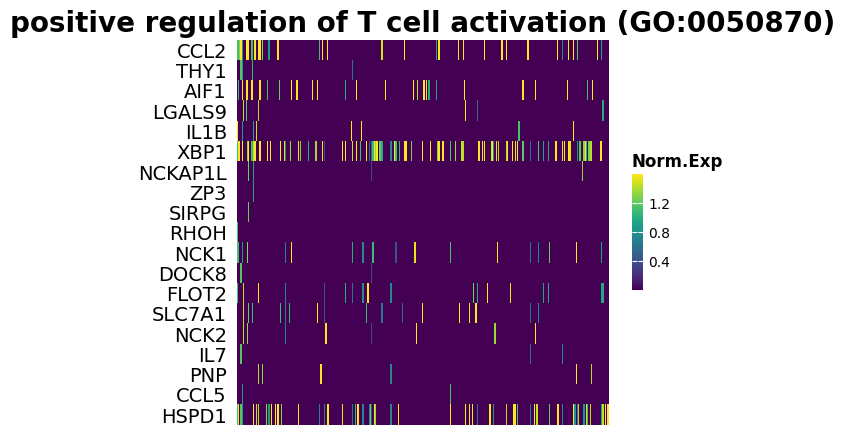

In [131]:
## Heatmap of gene expression
i = 7
genes = res.res2d.Lead_genes.iloc[i].split(";")
ax = gp.heatmap(df = res.heatmat.loc[genes],
           z_score=None,
           title=res.res2d.Term.iloc[i],
           figsize=(6,5),
           cmap=plt.cm.viridis,
           xticklabels=False)

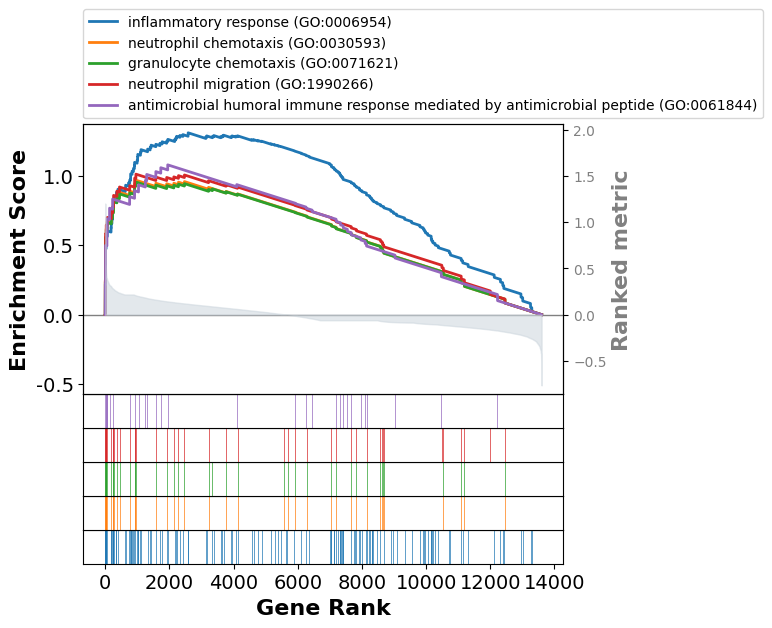

In [132]:
term = res.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res.plot(terms=term[:5])

In [134]:
# find degs
sc.tl.rank_genes_groups(bdata,
                        groupby='disease',
                        use_raw=False,
                        #layer='lognorm',
                        method='wilcoxon',
                        groups=["squamous cell lung carcinoma"],
                        reference='normal')

In [135]:
bdata.X.max() # already log1p

8.258444

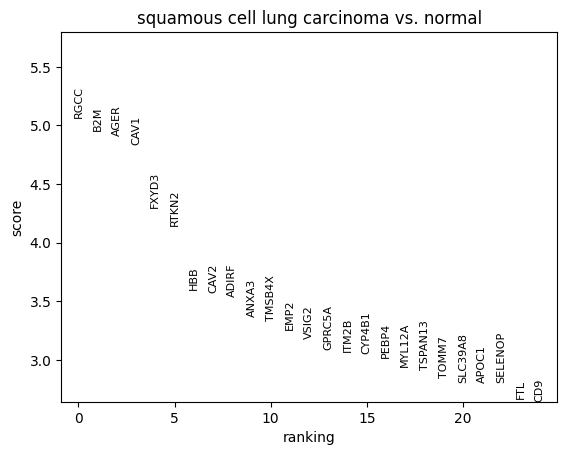

In [136]:
sc.pl.rank_genes_groups(bdata, n_genes=25, sharey=False)

In [141]:
# get deg result
result = bdata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group.split(' ')[0] + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [142]:
degs

,squamous_names,squamous_scores,squamous_pvals,squamous_pvals_adj,squamous_logfoldchanges
0,RGCC,5.068287,4.014120e-07,0.007532,3.873117
1,B2M,4.950668,7.395902e-07,0.008637,1.138853
2,AGER,4.907898,9.205767e-07,0.008637,1.755922
3,CAV1,4.838396,1.308910e-06,0.010526,1.844934
4,FXYD3,4.295747,1.741058e-05,0.089103,1.854532
...,...,...,...,...,...
56290,S100A8,-4.627218,3.706110e-06,0.023182,-4.500215
56291,PFN1,-4.683354,2.822189e-06,0.019859,-2.145910
56292,S100A9,-4.923937,8.482017e-07,0.008637,-4.582415
56293,SCGB1A1,-5.242042,1.588097e-07,0.004470,-6.452377


In [143]:
# subset up or down regulated genes
degs_sig = degs[degs.squamous_pvals_adj < 0.05]
degs_up = degs_sig[degs_sig.squamous_logfoldchanges > 0]
degs_dw = degs_sig[degs_sig.squamous_logfoldchanges < 0]

In [144]:
enr_up = gp.enrichr(degs_up.squamous_names,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

In [145]:
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

AttributeError: module 'matplotlib' has no attribute 'show'

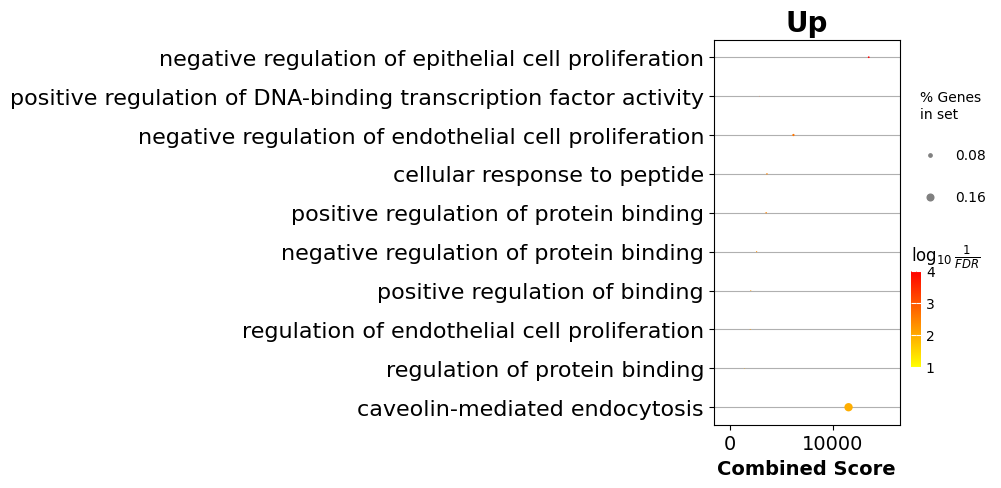

In [146]:
# dotplot
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Up", cmap = plt.cm.autumn_r)
plt.show()

In [147]:
enr_dw = gp.enrichr(degs_dw.squamous_names,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

AttributeError: module 'matplotlib' has no attribute 'show'

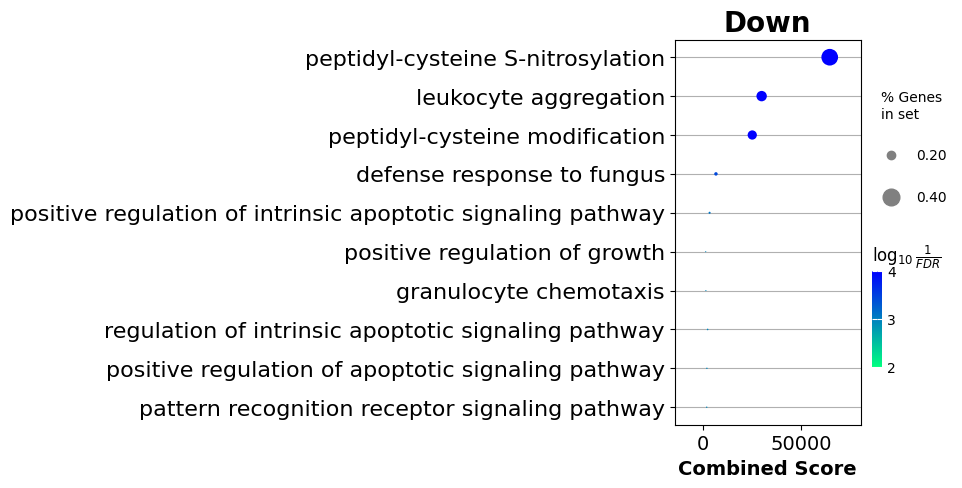

In [148]:
enr_dw.res2d.Term = enr_dw.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_dw.res2d,
           figsize=(3,5),
           title="Down",
           cmap = plt.cm.winter_r,
           size=5)
plt.show()

In [149]:
# concat results
enr_up.res2d['UP_DW'] = "UP"
enr_dw.res2d['UP_DW'] = "DOWN"
enr_res = pd.concat([enr_up.res2d.head(), enr_dw.res2d.head()])

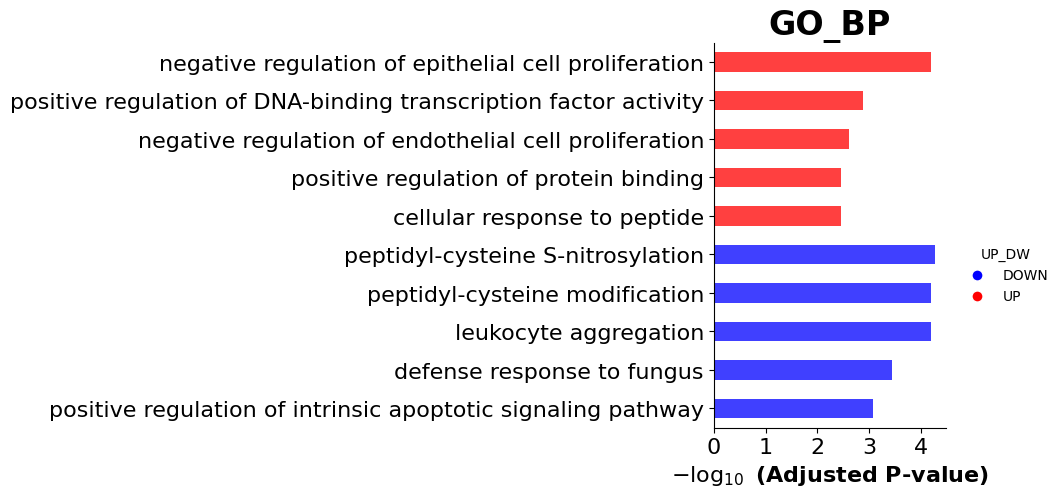

In [151]:
ax = gp.barplot(enr_res, figsize=(3,5),
                group ='UP_DW',
                title ="GO_BP",
                color = ['b','r'])

In [152]:
import networkx as nx

In [153]:
res.res2d.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,inflammatory response (GO:0006954),0.491565,3.063689,0.0,0.0,0.0,51/135,19.01%,S100A9;S100A8;THBS1;CCL2;CXCL3;CXCL8;CCL17;LYZ...
1,gsea,neutrophil chemotaxis (GO:0030593),0.701074,2.958924,0.0,0.0,0.0,18/43,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
2,gsea,granulocyte chemotaxis (GO:0071621),0.693708,2.954929,0.0,0.0,0.0,18/44,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
3,gsea,neutrophil migration (GO:1990266),0.6788,2.91827,0.0,0.0,0.0,18/45,7.04%,S100A9;S100A8;CCL2;CXCL3;CXCL8;CCL17;CCL3;S100...
4,gsea,antimicrobial humoral immune response mediated...,0.684802,2.881346,0.0,0.0,0.0,15/30,14.33%,S100A9;CXCL3;CXCL8;GAPDH;S100A12;RPS19;CXCL2;D...


In [154]:
nodes, edges = gp.enrichment_map(res.res2d)

In [155]:
nodes.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,gsea,cellular response to chemokine (GO:1990869),0.601294,2.671448,0.0,0.000348,0.001,15/33,15.42%,CCL2;CXCL3;CXCL8;CCL17;CCL3;LRCH1;CCL21;CXCL2;...,3.458551,0.454545
1,gsea,positive regulation of T cell activation (GO:0...,0.543825,2.669425,0.0,0.000304,0.001,19/43,14.87%,CCL2;THY1;AIF1;LGALS9;IL1B;XBP1;NCKAP1L;ZP3;SI...,3.516543,0.441860
2,gsea,chemokine-mediated signaling pathway (GO:0070098),0.61874,2.623396,0.0,0.000271,0.001,14/28,15.42%,CCL2;CXCL3;CXCL8;CCL17;CCL3;CCL21;CXCL2;CCL4;C...,3.567696,0.500000
3,gsea,positive regulation of lymphocyte activation (...,0.65236,2.58064,0.0,0.000244,0.001,7/22,5.94%,CCL2;ZNF335;THY1;TYROBP;NCKAP1L;SIRPG;IGLL1,3.613453,0.318182
4,gsea,monocyte chemotaxis (GO:0002548),0.697362,2.749667,0.0,0.000244,0.0,8/20,5.62%,CCL2;CCL17;CCL3;S100A12;RPS19;CCL21;CCL4;CCL20,3.613453,0.400000


In [159]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()